In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-22 10:09:59.004949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-22 10:09:59.025824: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-22 10:09:59.032202: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 10:09:59.047757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-22 10:10:00.522315: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,...,GRAE,Parameter STD,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B
3868,SPUD,hepatitis,random,0.3,"{'knn': 23, 'OD_method': 'default', 'agg_metho...","{'42': 0.6014492753623188, '1738': 0.550724637...","{'42': 0.00010501995379122034, '1738': 0.0, '5...","{'42': 0.5636363636363636, '1738': 0.681818181...",NaN,NaN,...,"{'42': {'RF-OOB': 0.5590909090909091, 'KNN_A':...","{'knn': 0.041524609847538, 'OD_method': 0.0362...","{'42': 0.5357142857142857, '1738': 0.857142857...","{'42': 0.5357142857142857, '1738': 0.714285714...","{'42': 0.6785714285714286, '1738': 0.857142857...","{'42': 0.5, '1738': 0.7142857142857143, '5271'...","{'42': 0.6847926267281107, '1738': 0.852559205...","{'42': 0.5080213903743316, '1738': 0.695238095...","{'42': 0.5448898927159797, '1738': 0.855654761...","{'42': 0.5303776683087028, '1738': 0.680868838..."
701,SPUD,FacebookMetrics,random,0.3,"{'knn': 32, 'OD_method': 'default', 'agg_metho...","{'42': 0.5113853109935832, '1738': -0.50416826...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.21557284806432087, '1738': 0.24795696...","{'42': 0.43613541896041375, '1738': 0.55598406...","{'42': 0.5227904299661339, '1738': 0.599408558...",...,"{'42': {'RF-OOB': 0.2037997216651265, 'KNN': 0...","{'knn': 0.34161826082477836, 'OD_method': 0.03...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,RF-MASH-,ConcreteCompressiveStrength,distort,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...","{'42': 0.80957056011704, '1738': 0.81650007536...","{'42': 0.029690357243849566, '1738': 0.0285370...","{'42': 0.8778204784415163, '1738': 0.855542592...","{'42': 0.74121585530181, '1738': 0.76360324088...","{'42': 0.707965297260979, '1738': 0.7288189119...",...,"{'42': {'RF-OOB': 0.8743153702019592, 'KNN': 0...","{'knn': 0.550909347985356, 'page_rank': 0.0059...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,RF-SPUD,ConcreteSlumpTest,skewed,0.3,"{'knn': 23, 'OD_method': 'default', 'agg_metho...",{'42': 0.4103594162755446},{'42': 0.0},{'42': 0.3734075206957336},{'42': 0.259856002073645},{'42': 0.13692669307086047},...,"{'42': {'RF-OOB': 0.08051874341017007, 'KNN': ...",{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2377,MASH-,balance_scale,skewed,0.3,"{'knn': 80, 'page_rank': 'full', 'DTM': 'kl', ...",{'42': 0.6192},{'42': 0.38781056},{'42': 0.674},NaN,NaN,...,"{'42': {'RF-OOB': 0.622, 'KNN_A': 0.616, 'RF_A...","{'knn': 0.05841251418583303, 'page_rank': 0.00...",{'42': 0.6},{'42': 0.648},{'42': 0.576},{'42': 0.608},{'42': 0.549418487394958},{'42': 0.5791443790299973},{'42': 0.5795574774774775},{'42': 0.64806468006468}


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log', 'n_pca': 75}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False,
   'n_pca': 75})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('RF-SPUD', 'iris', 'turn', {'knn': 14, 'OD_method': 'default', 'agg_method': 'log', 'n_pca': 75})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


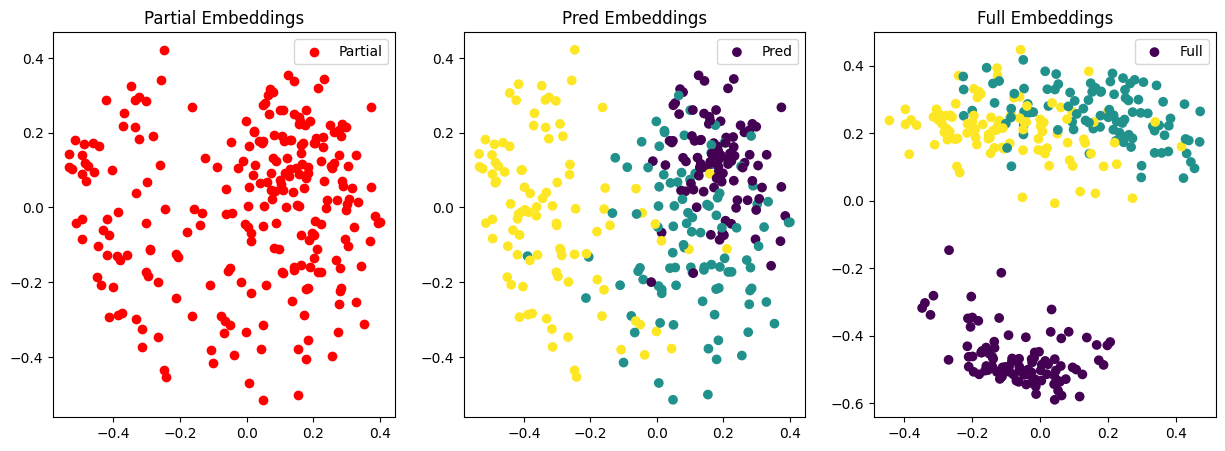

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

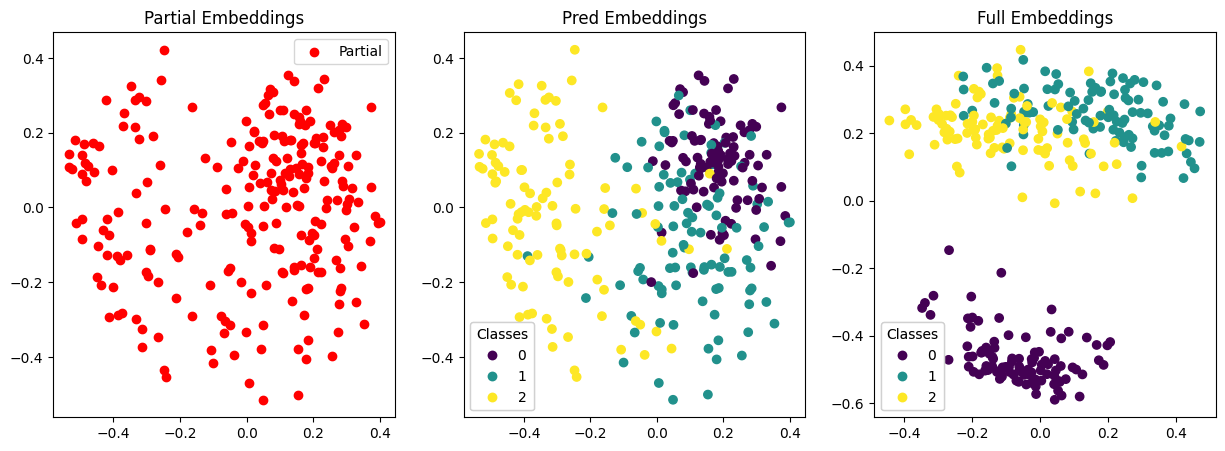

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log', 'n_pca': 75})


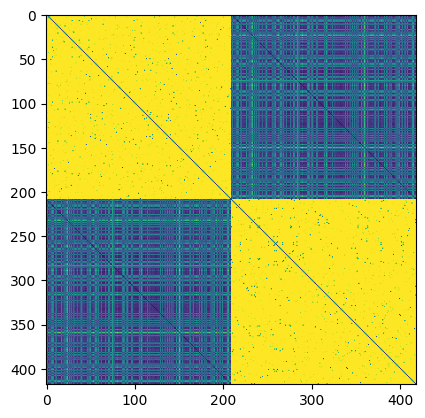

In [8]:
print(tasks[0])
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
plt.imshow(block_full)

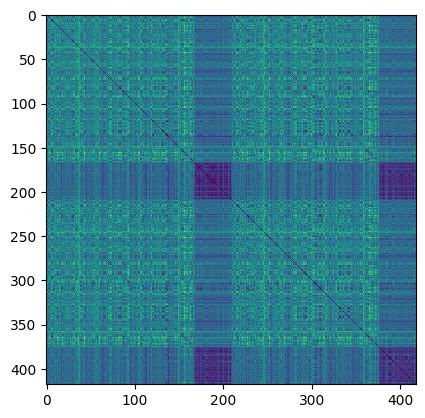

In [9]:
from scipy.spatial.distance import pdist, squareform
plt.imshow(squareform(pdist(emb_pred)))
#plt.imshow(squareform(pdist(emb_full)))

# Marshall's Tests here?

In [10]:
r_obs, p_value = mantel_test(*iris_task, plot = True, repeat_results = True)
print(*iris_task)
print(r_obs, p_value)

KeyboardInterrupt: 

In [11]:
#Unpack all the code and run the mantel test
for i in range(5):
    task_to_run = tasks[i+14]
    print(task_to_run)
    r_obs, p_value = mantel_test(method = task_to_run[0], dataset=task_to_run[1], split = task_to_run[2], params = task_to_run[3], plot = True)
    print(r_obs, p_value)

('RF-NAMA', 'ComputerHardware', 'skewed', {'OD_method': 'mean', 'agg_method': 'log'})
Results already exist for RF-NAMA, ComputerHardware, skewed.
Plotting is disabled for existing files.
nan nan
('MASH-', 'ComputerHardware', 'distort', {'knn': 7, 'page_rank': 'None', 'DTM': 'log', 'density_normalization': True})
Results already exist for MASH-, ComputerHardware, distort.
Plotting is disabled for existing files.
nan nan
('RF-SPUD', 'ComputerHardware', 'random', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})
Results already exist for RF-SPUD, ComputerHardware, random.
Plotting is disabled for existing files.
nan nan
('SPUD', 'ComputerHardware', 'skewed', {'knn': 17, 'OD_method': 'default', 'agg_method': 'log'})
Results already exist for SPUD, ComputerHardware, skewed.
Plotting is disabled for existing files.
nan nan
('SPUD', 'ComputerHardware', 'distort', {'knn': 22, 'OD_method': 'mean', 'agg_method': 'log'})
Results already exist for SPUD, ComputerHardware, distort.
Plotting

In [12]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=5)): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[103:108]
        )


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
  0%|          | 0/5 [00:00<?, ?it/s]2025-01-14 19:29:04.678902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-14 19:29:04.697041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-14 19:29:04.702605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 19:29:04.715957: I tensorflow/core/platf

Results already exist for RF-MASH-, Hydrodynamics, turn.


Results already exist for RF-SPUD, Hydrodynamics, distort.
Results already exist for MASH-, Hydrodynamics, even.


100%|██████████| 5/5 [00:12<00:00,  2.56s/it]

Results already exist for NAMA, Hydrodynamics, distort.
Results already exist for RF-SPUD, Hydrodynamics, skewed.


# Vizualizations

In [1]:
from Helpers.Mantels_Helpers import read_all_mantel_results, plot_averaged_mantel_stats, read_all_mantel_results_lam
from Helpers.Visualization_helpers import subset_df

2025-01-28 20:47:49.839741: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-28 20:47:49.861270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-28 20:47:49.879323: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-28 20:47:49.884714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 20:47:49.899096: I tensorflow/core/platform/cpu_feature_guar

In [2]:
mantel_df = read_all_mantel_results_lam()
mantel_df.sample(5)

,method,dataset,split,r_obs,p_value,five_point_summary,lam
2300,SPUD,ecoli_5,turn,0.953938,0.0,"{'min': -0.008197001240738275, 'Q1': -0.001470...",10000
2885,SSMA,heart_failure,distort,0.062483,0.0,"{'min': -0.006990923347292601, 'Q1': -0.001202...",10000
1869,SSMA,hepatitis,skewed,0.059508,0.0,"{'min': -0.017320163681145657, 'Q1': -0.002704...",0
2857,DTA,balance_scale,distort,0.133250,0.0,"{'min': -0.0031765076885512814, 'Q1': -0.00059...",0
3060,MASH-,heart_disease,distort,0.950844,0.0,"{'min': -0.010095615357795096, 'Q1': -0.001610...",1000


<Axes: xlabel='lam'>

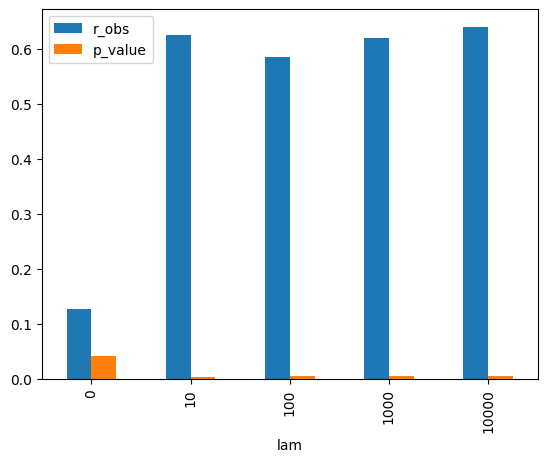

In [9]:
# Group by 'lam' and calculate the mean of 'r_obs' and 'p_value'
mantel_df.drop(columns = ["method", "dataset", "split", "five_point_summary"]).groupby('lam').mean()[['r_obs', 'p_value']].plot(kind = "bar")

In [7]:
subset_df(mantel_df, p_value = 1.0)

,method,dataset,split,r_obs,p_value,five_point_summary,lam
139,SSMA,Automobile,skewed,-0.071847,1.0,"{'min': -0.014841955411885193, 'Q1': -0.002403...",100
311,SSMA,ionosphere,skewed,-0.056475,1.0,"{'min': -0.005767799158535288, 'Q1': -0.001034...",100
874,SSMA,EnergyEfficiency,random,-0.046878,1.0,"{'min': -0.002736547535257248, 'Q1': -0.000482...",100
926,SSMA,EnergyEfficiency,even,-0.084066,1.0,"{'min': -0.0024916998995046747, 'Q1': -0.00048...",100
66,MAGAN,Automobile,distort,-0.031155,1.0,"{'min': -0.014755654889307584, 'Q1': -0.002980...",0
159,SSMA,EnergyEfficiency,even,-0.086545,1.0,"{'min': -0.002254169934652289, 'Q1': -0.000490...",10
241,NAMA,hepatitis,skewed,-0.035485,1.0,"{'min': -0.02039897616158193, 'Q1': -0.0034133...",0
400,SSMA,ionosphere,skewed,-0.036081,1.0,"{'min': -0.005942056892429064, 'Q1': -0.001032...",10000
603,MAGAN,ionosphere,skewed,-0.017390,1.0,"{'min': -0.008405274140238396, 'Q1': -0.001366...",0
620,SPUD,ionosphere,even,-0.027837,1.0,"{'min': -0.006963732294657673, 'Q1': -0.001313...",0


In [8]:
len(subset_df(mantel_df, p_value = 0.0))

3432

In [9]:
subset_df(mantel_df, method = "RF-SPUD")["r_obs"].mean()

nan

In [10]:
subset_df(mantel_df, method = "SPUD")["r_obs"].mean()

0.6890883633606966

Mean P-Value: 0.011188526466380543
Minimun P-value: 0.0
Maximum P-value: 1.0


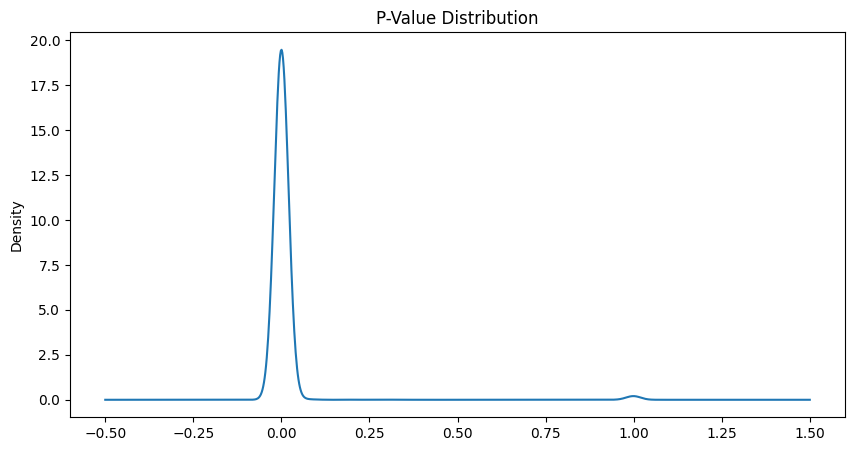

In [11]:
print(f"Mean P-Value: {mantel_df['p_value'].mean()}")
print(f"Minimun P-value: {mantel_df['p_value'].min()}")
print(f"Maximum P-value: {mantel_df['p_value'].max()}")

#The following will error if all the p_values are 0
if mantel_df["p_value"].max() == 0:
    print("All P-Values are 0 -- cannot plot")
else:
    mantel_df["p_value"].plot(kind="kde", title="P-Value Distribution", figsize=(10, 5))

Mean r_obs: 0.5428098010143689
Minimun r_obs: -0.17322293190110744
Maximum r_obs: 0.9999602354625808


<Axes: title={'center': 'r_obs Distribution'}, ylabel='Density'>

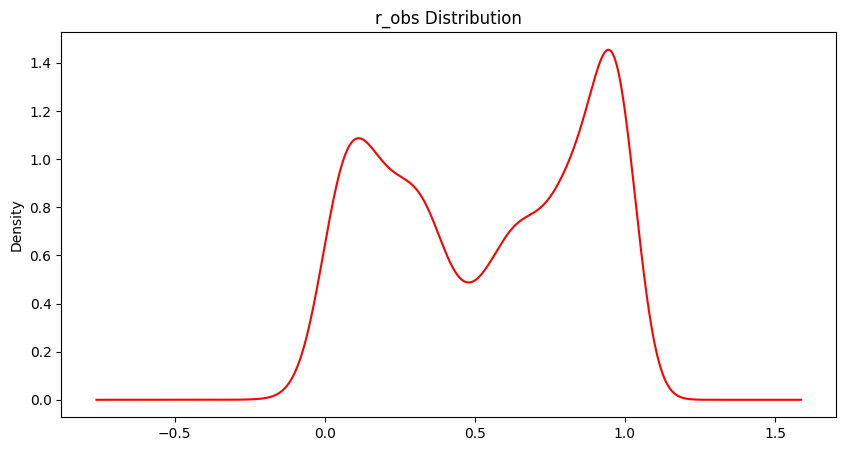

In [12]:
print(f"Mean r_obs: {mantel_df['r_obs'].mean()}")
print(f"Minimun r_obs: {mantel_df['r_obs'].min()}")
print(f"Maximum r_obs: {mantel_df['r_obs'].max()}")
mantel_df["r_obs"].plot(kind="kde", title="r_obs Distribution", figsize=(10, 5), c = "red")

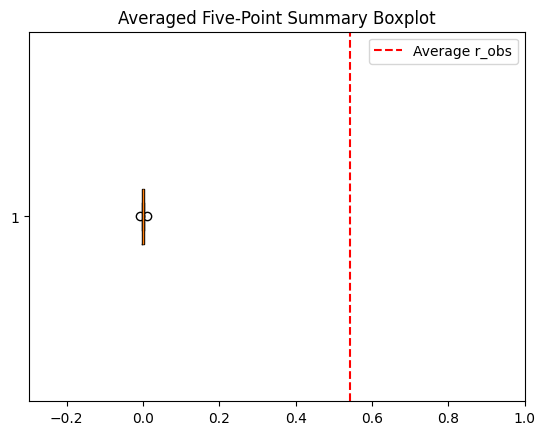

In [13]:
plot_averaged_mantel_stats(mantel_df)